In [ ]:
# updating because of some dependencies problems
! pip install pandas -U
! pip install pandas_profiling -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 5.0 MB/s 
     |████████████████████████████████| 102 kB 57.4 MB/s 
     |████████████████████████████████| 9.9 MB 51.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 690 kB 67.8 MB/s 
     |████████████████████████████████| 4.7 MB 37.8 MB/s 
     |████████████████████████████████| 296 kB 43.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ca95eecb06245729b96a9280123064fb86b344dcb8806acf5de9ed60ac0b0772
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas_profiling
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

xtrain_path = "/content/drive/MyDrive/nestle/X_train.csv"
ytrain_path = "/content/drive/MyDrive/nestle/Y_train.csv"

Mounted at /content/drive


## Reading data 

There is no data in `Y_test.csv` - that means we have to extract test data on our own.

`X_test.csv` contains only data for predictions (without target), so that they can compare results from different people.

The first thing we do, is x_train.head() and y_train.head() after pd.read_csv command. We see that each row corresponds to a different month, so each cell contains the expenditure of each product within each month.

We encode the dates in case we plot a time series, and then we remove the non-numerical data columns from the dataframe.


In [ ]:
x_train = pd.read_csv(xtrain_path,  sep=';', header=0)

labels_x, uniques_x = pd.factorize(x_train['date'])
date_x = labels_x

x_train.drop(columns=['key','date'],axis=1,inplace=True)

x_train = pd.concat([x_train[col].str.split()
                       .str[0]
                       .str.replace(',','.').astype(float) for col in x_train], axis=1)

###########################################################################

y_train = pd.read_csv(ytrain_path, sep=';', header=0)

labels_y, uniques_y = pd.factorize(y_train['date'])
date_y = labels_y

y_train.drop(columns=['key','date'],axis=1,inplace=True)
y_train = pd.concat([y_train[col].str.split()
                       .str[0]
                       .str.replace(',','.').astype(float) for col in y_train], axis=1) 

## EDA - Explorative Data Analysis

It has to be done to understand what there is actually in data, what the distribution of the data is, etc.

We can use data visualisation tools (I recommend seaborn - it's easy, plots are tidy and you can also create advanced plots).

To make it fast, I recommend trying a `pandas_profiling` library, which makes the most basic EDA automatically and prints you a report.

In [ ]:
x_train.describe()

x1           x2           x3           x4            x5  \
count  7800.000000  7793.000000  7797.000000  7795.000000   2876.000000   
mean      0.347830     0.354310     0.319932     0.336695    372.786005   
std       1.936792     1.965066     1.829656     2.027163   1241.064389   
min     -33.228353   -52.023791   -61.645734   -66.456706     -0.218961   
25%       0.000000     0.000000     0.000000     0.000000      1.809152   
50%       0.000000     0.000000     0.000000     0.000000     19.944190   
75%       0.000000     0.000000     0.000000     0.000000    136.762118   
max      65.134739    51.636600    53.112209    58.471756  17036.688540   

                 x6            x7            x8            x9           x10  \
count   2906.000000   7780.000000   7780.000000   7800.000000   7787.000000   
mean     382.011899    951.109916    924.281006    676.835635   1859.080333   
std     1326.111969   2825.566845   2643.918400   1984.928078   4542.140925   
min       -0.175169    -80.348046    -26.782682   -174.883211   -196.067620   
25%        1.753411     11.499549     12.351966      9.102475     33.701285   
50%       20.159825     83.294584     84.247536     63.515596    220.101934   
75%      135.828419    455.481914    471.741556    369.282624   1079.320921   
max    19046.124220  38518.234870  39314.030240  40010.669150  43112.658610   

       ...         x103          x104         x105          x106  \
count  ...  7797.000000   7793.000000  7796.000000   7796.000000   
mean   ...    44.668328    465.193962    12.705929    945.771714   
std    ...   244.642605   1296.109097    46.145829   2657.296779   
min    ...  -329.086066   -247.860736  -251.749756   -128.023454   
25%    ...     0.000000      5.133734     0.000000     11.664360   
50%    ...     1.711016     37.459257     0.323453     84.145884   
75%    ...    17.664795    232.762592     5.281627    446.065219   
max    ...  7909.322436  19508.953940  1241.243056  35366.547670   

               x107         x108         x109         x110          x111  \
count   7817.000000  7817.000000  7805.000000  7820.000000   7817.000000   
mean     679.741590     0.315714    82.991057    45.698039    454.877942   
std     1955.014962     1.536839   356.505770   226.049705   1231.749937   
min     -207.568811   -16.389952  -927.615894  -485.108770   -250.392248   
25%        9.217013     0.000000     0.000000     0.000000      5.114887   
50%       61.588430     0.000000     4.741318     1.670990     36.874337   
75%      365.907941     0.000000    45.395514    18.314854    229.778188   
max    38298.484340    41.261416  6733.987892  5499.072415  18661.314080   

              x112  
count  7818.000000  
mean     13.009074  
std      49.115564  
min    -317.319763  
25%       0.000000  
50%       0.303223  
75%       5.334830  
max    2222.065806  

[8 rows x 112 columns]

In [ ]:
y_train.describe()

y
count   8396.000000
mean    3641.988299
std     2268.977270
min        0.000000
25%     1867.329589
50%     3354.446181
75%     5087.705414
max    10000.000000

In [ ]:
#!pip install pandas-profiling
from pandas_profiling import ProfileReport

#prof = ProfileReport(x_train)
#prof.to_notebook_iframe()

# to make faster, less information
prof = ProfileReport(x_train, minimal=True)
prof.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We see, from head() and tail(), that the period of study is from Jan 2012 until June 2018. Therefore, the dates are repeated several times along the rows (8437 rows). This may indicate that we have accumulated the expenditures of each product each month in several retail shops, and then joined the data in this big dataframe.

Now, we can plot the total expenditure for each registered month. For this aim, we need to group the expenditures of each month via DataFrame.groupby(). We need to create a dictionary with date and expenditures lists; and then transform it into a dataframe.

This will help just as an insight on how much the business sold on each month, and as a guess for the reasons of local minima and maxima.

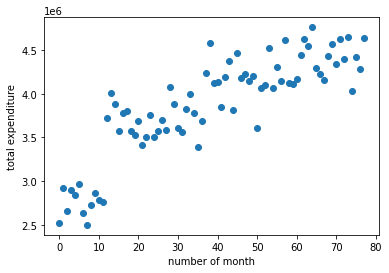

In [ ]:
total_exp = x_train.sum(axis=1)  #We sum each of the 112 variables on a row into only one total value 

dicto = {'date': date_x, 'expenditure': total_exp}
df = pd.DataFrame(dicto) 

df1 = df.groupby(['date']).agg(np.sum)
df1.reset_index(inplace=True)

plt.scatter(df1['date'], df1['expenditure'])
plt.xlabel('number of month')
plt.ylabel('total expenditure')
#plt.xlim([0,10])

plt.show()

Observing the resulting plot and zooming via plt.xlim, we obtain some insight:
- The trend manifests that the total expenditure increases year after year. The products might have become more popular with time.
- There is a significant rise of sales right after the first year. There might have been a huge marketing campaign, based on customers' feedback.
- The drops might be due to strong advertising campaigns of the competition.


Looking at target distribution, it seems that the demand planning worked mostly well, at first sight.

https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

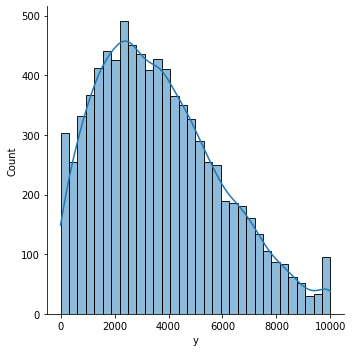

In [ ]:
sns.displot(data=y_train, x='y', kde=True)
plt.show()

So, here we are dealing with *REGRESSION* task - we don't predict class, but we predict value.

The target has a skewed distribution, similar to normal distribution. It's good - sometimes it is advisable to tranform target (for example calculate ln) so that target has a 'better' distribution.

We could consider taking a look at t-SNE method - it is a nice method to visualize multidimensional data on two dimensions.

### Is it okay to remove outliers?

An outlier is a data-item/object that deviates significantly from the rest of the (so-called normal) objects. They can be caused by measurement or execution errors. Basically, the values with more than 3 times the std.

We don't remove outliers unless they are errors in the data. They may contain important information, for instance, a discrete large purchase of a product.

Then, I would recommend not doing anything and allowing PCA (on one of the next cells) to take care of outliers.

## Dealing with missing values 

I filled them with 0 - that's okay, but only if it doesn't add misleading information to data.

We can fill it with mean value or also with other methods: https://scikit-learn.org/stable/modules/impute.html

So, from profile report it looks as if there is a lot of missing data (sometimes 66%), so we can't just remove these observations.

But here in this task - we can assume that `NaN` means `0` - it was jus not sold or data not available - that means no selling.

In [ ]:
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train.fillna(0, inplace=True)

# not to do the following thing - we may lose information, as data is float
# x_train = x_train.astype(int)

We have to remove data, where target is NaN.

In [ ]:
y_train.isna().sum()

y    41
dtype: int64

In [ ]:
indexes_to_remove = y_train.isna()
indexes_to_remove = indexes_to_remove[indexes_to_remove.y == True]
indexes_to_remove = list(indexes_to_remove.index)
indexes_to_remove

[150,
 287,
 324,
 648,
 857,
 1356,
 1583,
 1598,
 2162,
 2276,
 2500,
 2833,
 2920,
 3280,
 4243,
 4260,
 4324,
 4377,
 4645,
 4908,
 5343,
 5623,
 5733,
 6083,
 6322,
 6456,
 6583,
 6671,
 6722,
 6744,
 6846,
 6999,
 7106,
 7156,
 7237,
 7480,
 7526,
 7567,
 7777,
 8000,
 8024]

In [ ]:
x_train.drop(indexes_to_remove, axis=0, inplace=True)
y_train.drop(indexes_to_remove, axis=0, inplace=True)

# Extracting test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_train_raw = y_train #so as not to remove data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train_raw, test_size=0.3, random_state=42)

# Scaling

Standardization of a dataset is a common requirement for many machine learning
estimators: they might behave badly if the individual features do not more or 
less look like normally distributed data (Gaussian with 0 mean and variance 1).


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
scaled_features_xtrain = scaler.transform(X_train)
x_train_feat = pd.DataFrame(scaled_features_xtrain,columns=X_train.columns)
X_train = x_train_feat

scaler.fit(X_test)
scaled_features_xtest = scaler.transform(X_test)
x_test_feat = pd.DataFrame(scaled_features_xtest,columns=X_test.columns)
X_test = x_test_feat

scaler.fit(y_train)
scaled_features_ytrain = scaler.transform(y_train)
y_train_feat = pd.DataFrame(scaled_features_ytrain,columns=y_train.columns)
y_train = y_train_feat

scaler.fit(y_test)
scaled_features_ytest = scaler.transform(y_test)
y_test_feat = pd.DataFrame(scaled_features_ytest,columns=y_test.columns)
y_test = y_test_feat

# Feature selection

It's okay to look at correlations and the remove the ones which are correlated. In this case, we don't remove any column.

We also can see if any column should be somehow transformed or whether something is wrong about them.

As there are many columns, we can try to check the heatmap for different subsets from the dataframe.

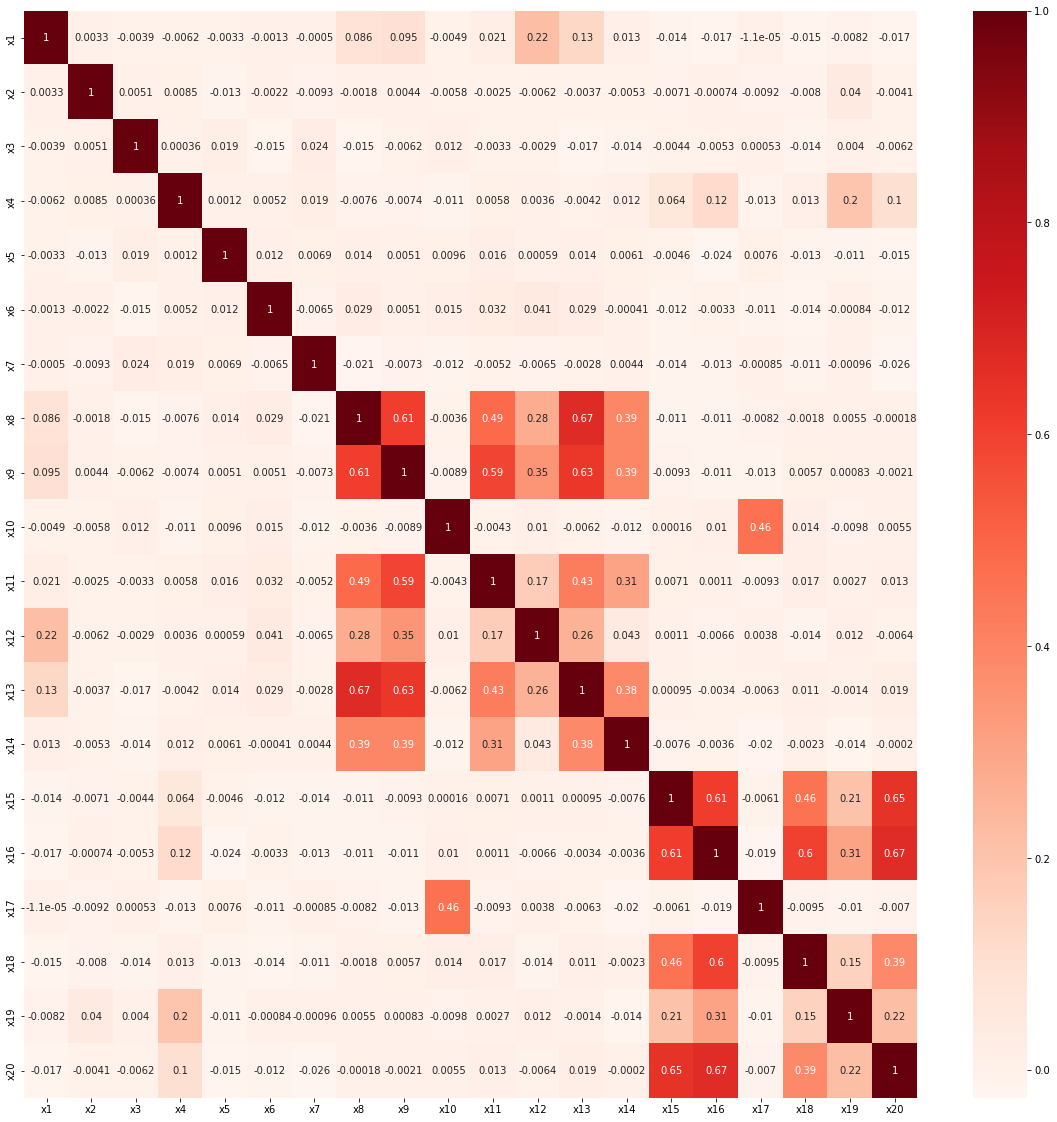

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = X_train.iloc[:,0:20].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# PCA

PCA is one of the methods to deal with high-dimensional data.

It just finds the directions in multi-dimensional space of variables, which have the highest variation. It uses the eigenvalue decomposition of data to find an orthogonal basis set that describes the variance in data points. 

We will try to create models on top of the PCA, and do it on raw data as well.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

n_components - if a number from $[0, 1]$ - it is a percentage of the whole variance that has to be remained in data. If it is int, it is the number of variables left.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(5877, 77)

Look at it! Only 77 columns are left and 90% of variance is preserved!

# Modelling

## First of all - metric

The goal of the business unit is to maximize Forecast Accuracy – the problem statement requires using WMAPE (weighted mean absolute percent error) as an error metric - so we have to write a function to do it.

Other common metrics you can find: https://scikit-learn.org/stable/modules/model_evaluation.html in a table with 'Regression'



In [ ]:
# let's go 100% from definition, though RMSE is the most used in these models

def wmape(y_true, y_hat):
  y_tr = np.array(y_true)
  y_h = np.array(y_hat)
  return (np.sum(np.abs(y_tr - y_h))) / np.sum(y_tr)

From the equation of WMAPE, that perfect estimator should have wmape = 0.

At first we can try simply linear regression, but it is rather a weak model.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_pca = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
lr_pca.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
wmape(y_test, lr.predict(X_test))

-9836111687345324.0

In [ ]:
wmape(y_test, lr_pca.predict(X_test_pca))

-9855987350361214.0

We can try fitting with automatic scaling inside a model

In [ ]:
lr_1 = LinearRegression(normalize=True)
lr_pca_1 = LinearRegression(normalize=True)

In [ ]:
lr_1.fit(X_train, y_train)
lr_pca_1.fit(X_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

LinearRegression(normalize=True)

The message: it just won't work and recommend using pipelines.

In [ ]:
wmape(y_test, lr_1.predict(X_test))

-9836111687345324.0

In [ ]:
wmape(y_test, lr_pca_1.predict(X_test_pca))

-9855987350361214.0

Nothing changed - that's what happens in Linear Regression (based on some maths)

For other different problems, we could consider to use cross-validation: https://towardsdatascience.com/what-is-cross-validation-60c01f9d9e75


I'll try RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf_pca = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train.y)
rf_pca.fit(X_train_pca, y_train.y)

RandomForestRegressor()

In [ ]:
wmape(y_test, rf.predict(X_test))

-2.6747909654642733e+19

In [ ]:
wmape(y_test, rf_pca.predict(X_test_pca))

-2.6087785176235057e+19

Oh, this one is not good

Let's try xgboost

https://xgboost.readthedocs.io/en/stable/parameter.html

In [ ]:
import xgboost

In [ ]:
xgb = xgboost.XGBRegressor(objective='reg:squarederror')
xgb_pca = xgboost.XGBRegressor(objective='reg:squarederror')

In [ ]:
xgb.fit(X_train, y_train.y)
xgb_pca.fit(X_train_pca, y_train.y)

XGBRegressor(objective='reg:squarederror')

In [ ]:
wmape(y_test, xgb.predict(X_test))

-2.634868180575697e+19

In [ ]:
wmape(y_test, xgb_pca.predict(X_test_pca))

-2.5795050128880767e+19

GridSearch with xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# you can add more: https://xgboost.readthedocs.io/en/stable/parameter.html
# it is small to make it faster

param_grid = {
    'eta': [0.1, 0.5],
    'max_depth': [2, 5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
gs = GridSearchCV(
    estimator = xgboost.XGBRegressor(objective='reg:squarederror'), # so that there are not warnings
    param_grid = param_grid,
    scoring = make_scorer(wmape, greater_is_better=False), 
    cv = 2
)

gs_pca = GridSearchCV(
    estimator = xgboost.XGBRegressor(objective='reg:squarederror'), # so that there are not warnings
    param_grid = param_grid,
    scoring = make_scorer(wmape, greater_is_better=False),
    cv = 2
)

In [ ]:
gs.fit(X_train, y_train.y)
gs_pca.fit(X_train_pca, y_train.y)

GridSearchCV(cv=2, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'eta': [0.1, 0.5], 'max_depth': [2, 5]},
             scoring=make_scorer(wmape, greater_is_better=False))

In [ ]:
wmape(y_test, gs.predict(X_test))

-2.6047213804425003e+19

In [ ]:
wmape(y_test, gs_pca.predict(X_test_pca))

-2.615536782148897e+19

The last one has the smallest value, but it's still much more bigger than simple linear regresson

Linear regression somehow seems to be the best - let's try ElasticNet - it consists of both: L1 and L2 parameters.

Elastic net regression combines L1 norms (LASSO) and L2 norms (ridge regression) into a penalized model for generalized linear regression. This gives it sparsity (L1) and robustness (L2) properties.

This regularization is used to prevent overfitting the model to training data. This is achieved by slightly perturbing ( adding noise ) the objective function of the model before optimizing it.

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid_elastic_net = {
    "max_iter": [10, 50, 100],
    "alpha": [0, 0.01, 0.1, 1, 10, 100],
    "l1_ratio": [0, 0.01, 0.1, 0.5, 0.7, 1]
}

grid_net = GridSearchCV(
    ElasticNet(), 
    param_grid_elastic_net, 
    scoring = make_scorer(wmape, greater_is_better=False), 
    cv=2
)

grid_net_pca = GridSearchCV(
    ElasticNet(), 
    param_grid_elastic_net, 
    scoring = make_scorer(wmape, greater_is_better=False), 
    cv=2
)

In [ ]:
grid_net.fit(X_train, y_train.y)
grid_net_pca.fit(X_train_pca, y_train.y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+03, tolerance: 2.910e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

GridSearchCV(cv=2, estimator=ElasticNet(),
             param_grid={'alpha': [0, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.01, 0.1, 0.5, 0.7, 1],
                         'max_iter': [10, 50, 100]},
             scoring=make_scorer(wmape, greater_is_better=False))

In [ ]:
wmape(y_test, grid_net.predict(X_test))

-2.533622021087539e+19

In [ ]:
wmape(y_test, grid_net_pca.predict(X_test_pca))

-2.531026630914219e+19

# RESULT

So, for now it seems that Linear Regression model on raw data is the best approach. 

We have tried to impute NaN values as the median of each column, but the errors were higher.

We could remove columns which have most values NaN in raw dataset. 

Another possibility is to try Neural Networks as well.